In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp tools

In [ ]:
#| export

import pandas as pd
import os
from pathlib import Path

# Load data / Manually input the data

In [ ]:
path_to_data = Path("../resources")

Creation of the csv file

In [ ]:
# columns = ["Company", "Year",
#             "Total Revenue", "Net Income", 
#             "Total Assets", "Total Liabilities", 
#             "Cash Flow from Operations"]
# df = pd.DataFrame(columns=columns)
# df.to_csv(path_to_data/"financial_data.csv", index=False)


Import csv into pandas

In [ ]:
file=path_to_data/"financial_data.csv"
df = pd.read_csv(file)
df.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operations
0,Microsoft,2025,281724,101832,619003,275524,136162
1,Microsoft,2024,245122,88136,512163,243686,118548
2,Microsoft,2023,211915,72361,411976,205753,87582
3,Apple,2024,391035,93736,364980,308030,118254
4,Apple,2023,383285,96995,352583,290437,110543


# Data preparation

## Percentage of change of each financial fact

Order by company and ascending year, for tools like .pct_change() whose operations operates in rows such as:  
> $(row_{i+1}- row_{i}) / row_{i}$

In [ ]:
df.sort_values(by=["Company", "Year"], inplace=True, ascending=[True, True])
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operations
5,Apple,2022,394328,99803,352755,302083,122151
4,Apple,2023,383285,96995,352583,290437,110543
3,Apple,2024,391035,93736,364980,308030,118254
2,Microsoft,2023,211915,72361,411976,205753,87582
1,Microsoft,2024,245122,88136,512163,243686,118548
0,Microsoft,2025,281724,101832,619003,275524,136162
8,Tesla,2022,81462,12587,82338,36440,14724
7,Tesla,2023,96773,14974,106618,43009,13256
6,Tesla,2024,97690,7153,122070,48390,14923


The percentage change has to be applied to all the facts (all columns except Company and Year)

In [ ]:
cols_to_change = df.columns.difference(['Company', 'Year'])
cols_to_change

Index(['Cash Flow from Operations', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Total Revenue'],
      dtype='object')

To avoid applying the method co rows of different companies, groupby Company

In [ ]:
pct_change_df = df.groupby("Company")[cols_to_change].pct_change() * 100
# Add suffix to the new columns to indicate they are growth percentages
pct_change_df = pct_change_df.add_suffix(' growth (%)')

## Fill NA values that result from pct_change calculations with 0 or an appropriate value


In [ ]:
pct_change_df.fillna(0, inplace=True)

We can add the new columns to the original dataframe

In [ ]:
df_with_growth = pd.concat([df, pct_change_df], axis=1)
df_with_growth

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operations,Cash Flow from Operations growth (%),Net Income growth (%),Total Assets growth (%),Total Liabilities growth (%),Total Revenue growth (%)
5,Apple,2022,394328,99803,352755,302083,122151,0.000000,0.000000,0.000000,0.000000,0.000000
4,Apple,2023,383285,96995,352583,290437,110543,-9.502992,-2.813543,-0.048759,-3.855232,-2.800461
3,Apple,2024,391035,93736,364980,308030,118254,6.975566,-3.359967,3.516052,6.057424,2.021994
2,Microsoft,2023,211915,72361,411976,205753,87582,0.000000,0.000000,0.000000,0.000000,0.000000
1,Microsoft,2024,245122,88136,512163,243686,118548,35.356580,21.800417,24.318650,18.436183,15.669962
0,Microsoft,2025,281724,101832,619003,275524,136162,14.858117,15.539621,20.860546,13.065174,14.932156
8,Tesla,2022,81462,12587,82338,36440,14724,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tesla,2023,96773,14974,106618,43009,13256,-9.970117,18.964010,29.488207,18.026894,18.795267
6,Tesla,2024,97690,7153,122070,48390,14923,12.575438,-52.230533,14.492862,12.511335,0.947578


## Optionally, you could summarize these findings for each company


In [ ]:
df_with_growth.columns

Index(['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Cash Flow from Operations',
       'Cash Flow from Operations growth (%)', 'Net Income growth (%)',
       'Total Assets growth (%)', 'Total Liabilities growth (%)',
       'Total Revenue growth (%)'],
      dtype='object')

In [ ]:
summary = df_with_growth.groupby('Company').agg({
    'Total Revenue growth (%)': 'mean',
    'Net Income growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)


Year-over-Year Average Growth Rates (%):
     Company  Total Revenue growth (%)  Net Income growth (%)
0      Apple                 -0.259489              -2.057837
1  Microsoft                 10.200706              12.446679
2      Tesla                  6.580948             -11.088841


# Graphs

In [ ]:
#| export
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cols_to_change

Index(['Cash Flow from Operations', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Total Revenue'],
      dtype='object')

## Plot the percentage of change of the financial facts accross years

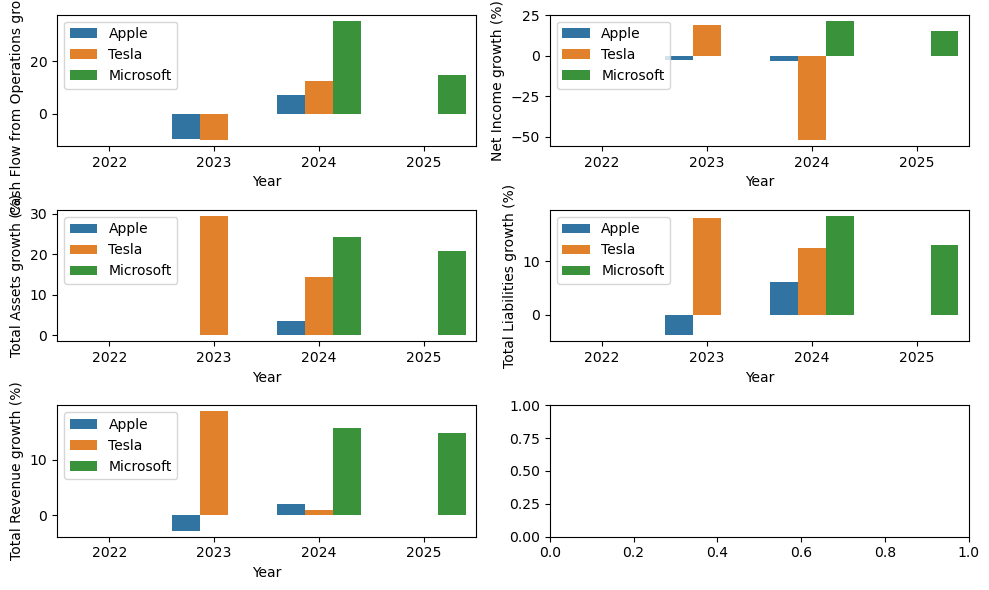

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(10, 6))

for col in cols_to_change:
    ax = axs.flatten()[cols_to_change.get_loc(col)]
    sns.barplot(data=df_with_growth, x="Year", y=f"{col} growth (%)", hue="Company", ax=ax)
    ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.gridspec as gridspec


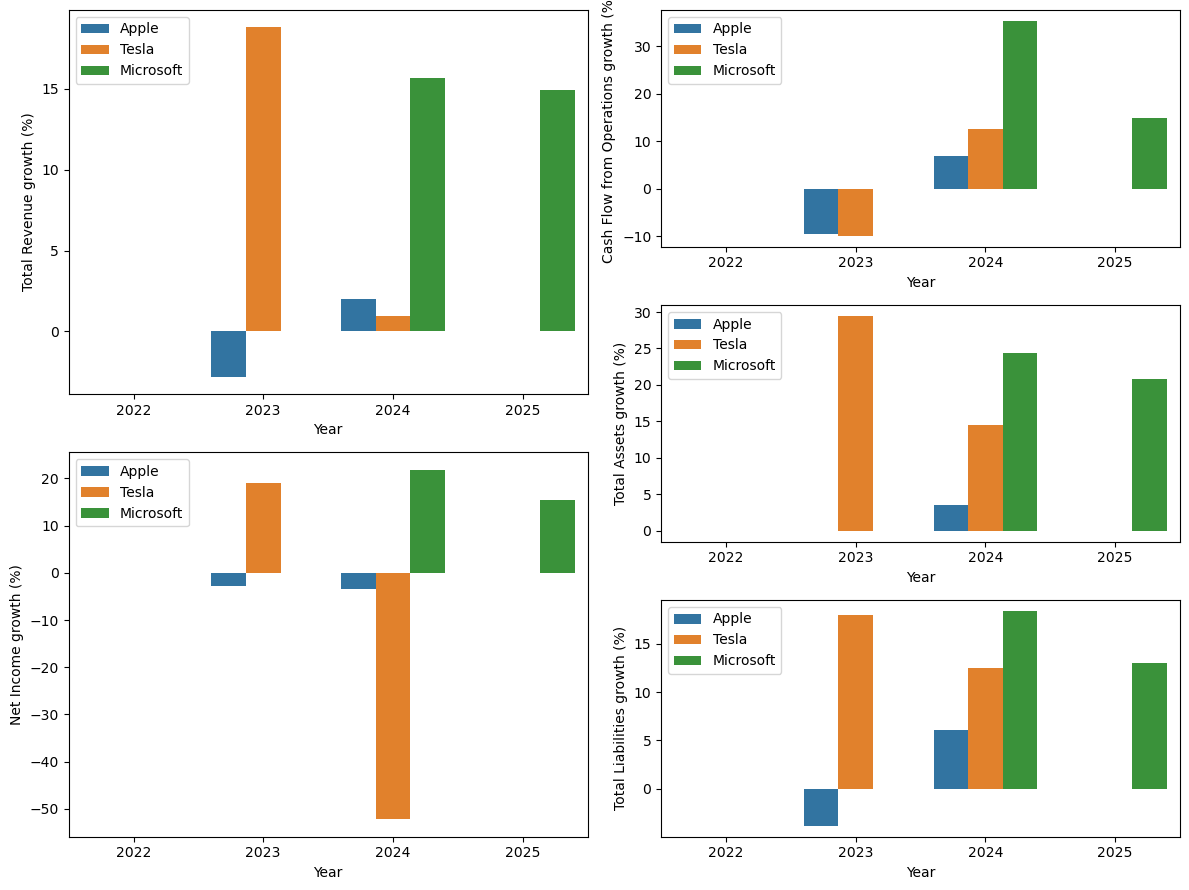

In [ ]:
cols_to_plot = ['Total Revenue', 'Net Income',
                'Cash Flow from Operations', 'Total Assets', 'Total Liabilities']

fig = plt.figure(figsize=(12, 9))

gs = gridspec.GridSpec(6, 2, figure=fig)
axs = []
ax0 = fig.add_subplot(gs[:3, 0])
ax1 = fig.add_subplot(gs[3:, 0])
ax2 = fig.add_subplot(gs[:2, 1])
ax3 = fig.add_subplot(gs[2:4, 1])
ax4 = fig.add_subplot(gs[4:, 1])
axs.extend([ax0, ax1, ax2, ax3, ax4])

for i, col in enumerate(cols_to_plot):
    ax = axs[i]
    sns.barplot(data=df_with_growth, x="Year", y=f"{col} growth (%)", hue="Company", ax=ax)
    ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

+ 2023 was not a good financial year and companies like Apple and Tesla have negative growth in their Cash Flow from operations, and even in 2024 the consecuences of 2023 can be seen in the Net income growth and Total Revenue growth.
+ Both Tesla and Apple have their main business related to selling physical products, however Microsoft is specialised in software and their growth is stable for the current data. 

# Save dataframe

In [ ]:
# Ensure target folder exists and save the dataframe
path_to_data.mkdir(parents=True, exist_ok=True)
output_file = path_to_data / "financial_data_chatbot.csv"
df_with_growth.to_csv(output_file, index=False)
print(f"DataFrame saved to: {output_file}")

DataFrame saved to: ../resources/financial_data_chatbot.csv
